In [24]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Load dataset

In [9]:
path = 'C:/Users/admin/Desktop/Programming/Python/pythonProject1/data/pwaic-iris-dataset-competition'
X_train = read_csv(path + '/training.csv')
y_test = read_csv(path + '/testing.csv')

# Visualize dataset

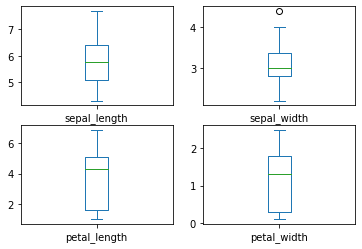

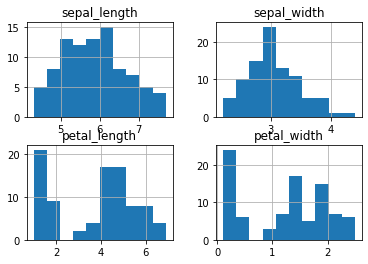

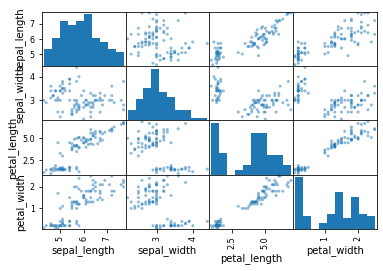

In [11]:
X_train.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
X_train.hist()
scatter_matrix(X_train)

plt.show()

# Train dataset

## Split data

In [18]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

## Model choice

In [14]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [19]:
names = []
results = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} {cv_results.std()}')

LR: 0.9160714285714284 0.09383074753871179
LDA: 0.9589285714285716 0.0629068391207448
KNN: 0.9285714285714285 0.07142857142857145
CART: 0.9017857142857144 0.09079088442061545
NB: 0.9589285714285716 0.0629068391207448
SVM: 0.9428571428571428 0.06998542122237654


## Model comparison

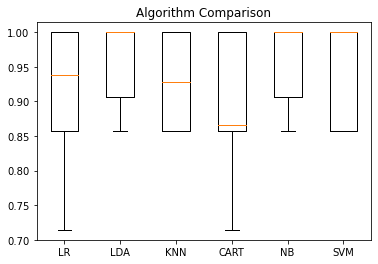

In [21]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Predict

In [31]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
# predictions = model.predict(X_validation)

SVC(gamma='auto')

In [32]:
path = 'C:/Users/admin/Desktop/Programming/Python/pythonProject1/data/pwaic-iris-dataset-competition'
#X_train = read_csv(path + '/training.csv')
predictions = model.predict(y_test)

C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


### Evaluate predictions

In [25]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9444444444444444
[[6 0 0]
 [0 7 0]
 [0 1 4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.94        18
      macro avg       0.96      0.93      0.94        18
   weighted avg       0.95      0.94      0.94        18



C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
